# Experiment runner for paper


For callibration run uncomment `compensation method 1 sphere` and `compensation method measurement 1 tube`

In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib
251/4045


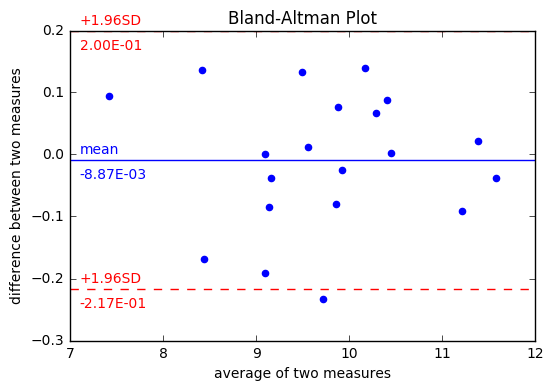

INFO:teigen.tgmain:Starting Teigen
INFO:teigen.tgmain:Starting Teigen


Populating the interactive namespace from numpy and matplotlib
/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
251/4045


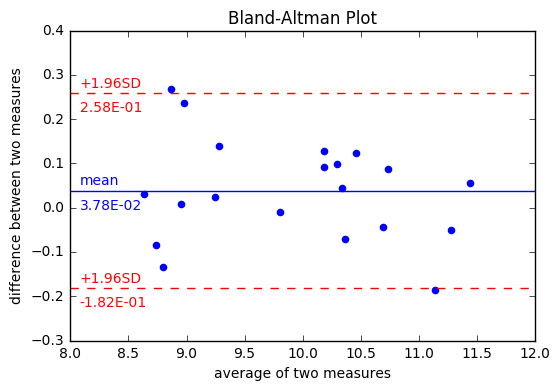

INFO:teigen.tgmain:Starting Teigen
INFO:teigen.tgmain:Starting Teigen


/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']


In [43]:
%run evaltools.ipynb
%run experiments_params.ipynb
%run paper_experiments_params.ipynb

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns
import sys
pth = op.abspath("../")
print pth
sys.path.insert(0, pth)
import teigen
import itertools
reload(teigen)
print teigen.__path__
import teigen.tb_vtk
reload (teigen.tb_vtk)

/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']


<module 'teigen.tb_vtk' from '/home/mjirik/projects/teigen/teigen/tb_vtk.pyc'>

In [45]:
run_list = [
    # == measurement comepenstaion factor estimation
#     "compensation method 1 sphere"
    
    #
    # == paper experiments
#     "generated volume resolution_mm", # done
#     "generated volume isotropy", # one half
#     "generated volume radius", # ok
#     "generated volume length",  # do pulky
#     "generated volume element_number anisotropic", # asi ok
#     "generated volume noise", 
    
    # == Other experiments
#     "mix 2", # test quality of compensation proklatě velký
#     "mix 5",
    # "short",
    "element number", # run in the morning
#     "mix 4", # new 
#     "proof mix", # new surface compensation parameters
#     "mix 44",
#     "mix 6",
#     "mix 7",
#     "mix 8",
#     "mix 9",
#     "mix 10",
#     "mix 3",
#     "volume fraction overlap",
#     "volume fraction overlap 4", 
#     "porosity", 
#     "compensation method 5 tubes", # looks good it is used for compensation factor computation - not for paper
]

In [46]:
tg = teigen.tgmain.Teigen()
config = tg.get_default_config()

INFO:teigen.tgmain:Starting Teigen


In [47]:
# pp(config)
# config

# Prepare multiple configs


In [ ]:
tg = teigen.tgmain.Teigen()
if not "configs" in dir():
    configs = []

INFO:teigen.tgmain:Starting Teigen


In [ ]:
configs_list = select_configs(configs, run_list)
# print(configs_list)
# debugllevel info 20
run_configs(configs_list, loglevel=20)

INFO:teigen.tgmain:Starting Teigen
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:23:57.007734
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


0 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


/home/mjirik/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
INFO:teigen.tgmain:time: 0:00:02.274952
INFO:teigen.tgmain:time before volume generate: 0:00:00.024795
INFO:teigen.tgmain:time before volume save: 0:00:00.024795
INFO:teigen.tgmain:time after volume save: 0:00:00.043111


step1 finished


/home/mjirik/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:00.973414
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
1 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:02.096636
INFO:teigen.tgmain:time before volume generate: 0:00:00.020606
INFO:teigen.tgmain:time before volume save: 0:00:00.020606
INFO:teigen.tgmain:time after volume save: 0:00:00.039711


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:04.753529
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
2 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:02.550555
INFO:teigen.tgmain:time before volume generate: 0:00:00.021037
INFO:teigen.tgmain:time before volume save: 0:00:00.021037
INFO:teigen.tgmain:time after volume save: 0:00:00.044107


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:09.017921
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
3 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:02.218217
INFO:teigen.tgmain:time before volume generate: 0:00:00.020124
INFO:teigen.tgmain:time before volume save: 0:00:00.020124
INFO:teigen.tgmain:time after volume save: 0:00:00.041847


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:12.966218
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
4 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:02.315157
INFO:teigen.tgmain:time before volume generate: 0:00:00.019888
INFO:teigen.tgmain:time before volume save: 0:00:00.019888
INFO:teigen.tgmain:time after volume save: 0:00:00.040918


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:16.938630
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
5 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:04.976124
INFO:teigen.tgmain:time before volume generate: 0:00:00.020129
INFO:teigen.tgmain:time before volume save: 0:00:00.020129
INFO:teigen.tgmain:time after volume save: 0:00:00.052982


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:23.624751
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
6 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:04.962756
INFO:teigen.tgmain:time before volume generate: 0:00:00.020218
INFO:teigen.tgmain:time before volume save: 0:00:00.020218
INFO:teigen.tgmain:time after volume save: 0:00:00.062094


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:30.412768
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
7 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:06.205714
INFO:teigen.tgmain:time before volume generate: 0:00:00.020749
INFO:teigen.tgmain:time before volume save: 0:00:00.020749
INFO:teigen.tgmain:time after volume save: 0:00:00.066560


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:38.360999
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
8 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:05.714233
INFO:teigen.tgmain:time before volume generate: 0:00:00.020624
INFO:teigen.tgmain:time before volume save: 0:00:00.020624
INFO:teigen.tgmain:time after volume save: 0:00:00.065426


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:45.858701
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
9 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:05.657217
INFO:teigen.tgmain:time before volume generate: 0:00:00.027627
INFO:teigen.tgmain:time before volume save: 0:00:00.027627
INFO:teigen.tgmain:time after volume save: 0:00:00.083992


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:24:53.224314
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
10 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:09.263580
INFO:teigen.tgmain:time before volume generate: 0:00:00.021053
INFO:teigen.tgmain:time before volume save: 0:00:00.021053
INFO:teigen.tgmain:time after volume save: 0:00:00.092666


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:25:04.300392
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
11 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:08.916081
INFO:teigen.tgmain:time before volume generate: 0:00:00.019763
INFO:teigen.tgmain:time before volume save: 0:00:00.019763
INFO:teigen.tgmain:time after volume save: 0:00:00.087959


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:25:14.962324
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
12 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9


INFO:teigen.tgmain:time: 0:00:11.937385
INFO:teigen.tgmain:time before volume generate: 0:00:00.019924
INFO:teigen.tgmain:time before volume save: 0:00:00.019924
INFO:teigen.tgmain:time after volume save: 0:00:00.099524


generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:25:28.672806
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
13 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:10.812461
INFO:teigen.tgmain:time before volume generate: 0:00:00.026635
INFO:teigen.tgmain:time before volume save: 0:00:00.026635
INFO:teigen.tgmain:time after volume save: 0:00:00.115400


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:25:41.284919
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
14 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:10.935639
INFO:teigen.tgmain:time before volume generate: 0:00:00.020612
INFO:teigen.tgmain:time before volume save: 0:00:00.020612
INFO:teigen.tgmain:time after volume save: 0:00:00.102959


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:25:53.988834
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
15 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:15.183835
INFO:teigen.tgmain:time before volume generate: 0:00:00.020441
INFO:teigen.tgmain:time before volume save: 0:00:00.020441
INFO:teigen.tgmain:time after volume save: 0:00:00.114381


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:26:10.933625
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
16 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:15.125550
INFO:teigen.tgmain:time before volume generate: 0:00:00.020024
INFO:teigen.tgmain:time before volume save: 0:00:00.020024
INFO:teigen.tgmain:time after volume save: 0:00:00.115654


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:26:27.918038
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
17 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:20.589847
INFO:teigen.tgmain:time before volume generate: 0:00:00.019849
INFO:teigen.tgmain:time before volume save: 0:00:00.019849
INFO:teigen.tgmain:time after volume save: 0:00:00.137646


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:26:50.328430
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
18 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:18.654772
INFO:teigen.tgmain:time before volume generate: 0:00:00.033563
INFO:teigen.tgmain:time before volume save: 0:00:00.033563
INFO:teigen.tgmain:time after volume save: 0:00:00.151366


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:27:10.765564
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
19 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:18.484283
INFO:teigen.tgmain:time before volume generate: 0:00:00.020155
INFO:teigen.tgmain:time before volume save: 0:00:00.020155
INFO:teigen.tgmain:time after volume save: 0:00:00.135850


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:27:31.085325
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
20 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.575699
INFO:teigen.tgmain:time before volume generate: 0:00:00.019766
INFO:teigen.tgmain:time before volume save: 0:00:00.019766
INFO:teigen.tgmain:time after volume save: 0:00:00.162260


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:27:58.647714
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
21 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.985171
INFO:teigen.tgmain:time before volume generate: 0:00:00.023015


step1 finished


INFO:teigen.tgmain:time before volume save: 0:00:00.023015
INFO:teigen.tgmain:time after volume save: 0:00:00.176581
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:28:26.852154
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
22 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:47.849450


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023170
INFO:teigen.tgmain:time before volume save: 0:00:00.023170
INFO:teigen.tgmain:time after volume save: 0:00:00.199321
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:29:16.582952
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
23 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.805616


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.021436
INFO:teigen.tgmain:time before volume save: 0:00:00.021436
INFO:teigen.tgmain:time after volume save: 0:00:00.200944
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:30:01.383838
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
24 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.812239


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019738
INFO:teigen.tgmain:time before volume save: 0:00:00.019738
INFO:teigen.tgmain:time after volume save: 0:00:00.186501
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:30:46.059438
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
25 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:52.890145


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019009
INFO:teigen.tgmain:time before volume save: 0:00:00.019009
INFO:teigen.tgmain:time after volume save: 0:00:00.216041
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:31:40.752643
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
26 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.903601


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019737
INFO:teigen.tgmain:time before volume save: 0:00:00.019737
INFO:teigen.tgmain:time after volume save: 0:00:00.213130
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:32:33.516724
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
27 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:07.413327


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019809
INFO:teigen.tgmain:time before volume save: 0:00:00.019809
INFO:teigen.tgmain:time after volume save: 0:00:00.257771
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:33:42.798550
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
28 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:59.604778


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030882
INFO:teigen.tgmain:time before volume save: 0:00:00.030882
INFO:teigen.tgmain:time after volume save: 0:00:00.415277
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:34:44.797754
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
29 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:59.832597


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019378
INFO:teigen.tgmain:time before volume save: 0:00:00.019378
INFO:teigen.tgmain:time after volume save: 0:00:00.241651
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:35:46.498023
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
30 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.192435


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.020840
INFO:teigen.tgmain:time before volume save: 0:00:00.020840
INFO:teigen.tgmain:time after volume save: 0:00:00.282041
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:36:59.671293
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
31 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.639142


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030097
INFO:teigen.tgmain:time before volume save: 0:00:00.030097
INFO:teigen.tgmain:time after volume save: 0:00:00.311151
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:38:13.288678
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
32 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:37.006102


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.028863
INFO:teigen.tgmain:time before volume save: 0:00:00.028863
INFO:teigen.tgmain:time after volume save: 0:00:00.347446
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:39:52.362825
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
33 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:22.992026


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019411
INFO:teigen.tgmain:time before volume save: 0:00:00.019411
INFO:teigen.tgmain:time after volume save: 0:00:00.363825
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:41:17.380520
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
34 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:22.538993


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019435
INFO:teigen.tgmain:time before volume save: 0:00:00.019435
INFO:teigen.tgmain:time after volume save: 0:00:00.311623
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:42:41.904426
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
35 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:00:25.507216
INFO:teigen.tgmain:time before volume generate: 0:00:00.023390
INFO:teigen.tgmain:time before volume save: 0:00:00.023390
INFO:teigen.tgmain:time after volume save: 0:00:00.056116



generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:43:09.017328
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
36 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:00:25.242261
INFO:teigen.tgmain:time before volume generate: 0:00:00.023456
INFO:teigen.tgmain:time before volume save: 0:00:00.023456
INFO:teigen.tgmain:time after volume save: 0:00:00.046930


progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:43:35.851130
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
37 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.560612
INFO:teigen.tgmain:time before volume generate: 0:00:00.024123
INFO:teigen.tgmain:time before volume save: 0:00:00.024123
INFO:teigen.tgmain:time after volume save: 0:00:00.056424


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:44:04.067845
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
38 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.949489
INFO:teigen.tgmain:time before volume generate: 0:00:00.039211
INFO:teigen.tgmain:time before volume save: 0:00:00.039211
INFO:teigen.tgmain:time after volume save: 0:00:00.074941


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:44:31.801091
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
39 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.836874
INFO:teigen.tgmain:time before volume generate: 0:00:00.032738
INFO:teigen.tgmain:time before volume save: 0:00:00.032738
INFO:teigen.tgmain:time after volume save: 0:00:00.070632


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:44:59.288623
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
40 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.217173
INFO:teigen.tgmain:time before volume generate: 0:00:00.023554
INFO:teigen.tgmain:time before volume save: 0:00:00.023554
INFO:teigen.tgmain:time after volume save: 0:00:00.071247


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:45:31.184839
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
41 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.365122
INFO:teigen.tgmain:time before volume generate: 0:00:00.025881
INFO:teigen.tgmain:time before volume save: 0:00:00.025881
INFO:teigen.tgmain:time after volume save: 0:00:00.073581


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:46:03.313474
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
42 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:00:33.032397
INFO:teigen.tgmain:time before volume generate: 0:00:00.023618
INFO:teigen.tgmain:time before volume save: 0:00:00.023618
INFO:teigen.tgmain:time after volume save: 0:00:00.087021


generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:46:38.169125
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
43 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.121075
INFO:teigen.tgmain:time before volume generate: 0:00:00.023251
INFO:teigen.tgmain:time before volume save: 0:00:00.023251
INFO:teigen.tgmain:time after volume save: 0:00:00.084853


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:47:11.944640
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
44 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.925176
INFO:teigen.tgmain:time before volume generate: 0:00:00.024449
INFO:teigen.tgmain:time before volume save: 0:00:00.024449
INFO:teigen.tgmain:time after volume save: 0:00:00.086900


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:47:46.610613
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
45 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:39.094641
INFO:teigen.tgmain:time before volume generate: 0:00:00.024420
INFO:teigen.tgmain:time before volume save: 0:00:00.024420
INFO:teigen.tgmain:time after volume save: 0:00:00.109475


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:48:27.466644
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
46 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.701412
INFO:teigen.tgmain:time before volume generate: 0:00:00.039268
INFO:teigen.tgmain:time before volume save: 0:00:00.039268
INFO:teigen.tgmain:time after volume save: 0:00:00.147274


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:49:08.014634
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
47 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.465926
INFO:teigen.tgmain:time before volume generate: 0:00:00.023954
INFO:teigen.tgmain:time before volume save: 0:00:00.023954
INFO:teigen.tgmain:time after volume save: 0:00:00.135093


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:49:53.423560
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
48 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.268664
INFO:teigen.tgmain:time before volume generate: 0:00:00.024142
INFO:teigen.tgmain:time before volume save: 0:00:00.024142
INFO:teigen.tgmain:time after volume save: 0:00:00.135562


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:50:37.546368
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
49 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.438178
INFO:teigen.tgmain:time before volume generate: 0:00:00.030155
INFO:teigen.tgmain:time before volume save: 0:00:00.030155
INFO:teigen.tgmain:time after volume save: 0:00:00.142430


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:51:21.804377
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
50 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:00:51.181911
INFO:teigen.tgmain:time before volume generate: 0:00:00.027473
INFO:teigen.tgmain:time before volume save: 0:00:00.027473
INFO:teigen.tgmain:time after volume save: 0:00:00.163341



progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:52:14.819166
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
51 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:52.769917
INFO:teigen.tgmain:time before volume generate: 0:00:00.024181
INFO:teigen.tgmain:time before volume save: 0:00:00.024181
INFO:teigen.tgmain:time after volume save: 0:00:00.163762


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:53:09.425039
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
52 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:01.736926


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.037351
INFO:teigen.tgmain:time before volume save: 0:00:00.037351
INFO:teigen.tgmain:time after volume save: 0:00:00.230495
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:54:13.063976
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
53 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:00:59.074277


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023315
INFO:teigen.tgmain:time before volume save: 0:00:00.023315
INFO:teigen.tgmain:time after volume save: 0:00:00.192602
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:55:13.934918
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
54 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:56.525257


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023431
INFO:teigen.tgmain:time before volume save: 0:00:00.023431
INFO:teigen.tgmain:time after volume save: 0:00:00.191853
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:56:12.307167
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
55 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.543810


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023774
INFO:teigen.tgmain:time before volume save: 0:00:00.023774
INFO:teigen.tgmain:time after volume save: 0:00:00.229441
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:57:23.715368
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
56 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.258272


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023396
INFO:teigen.tgmain:time before volume save: 0:00:00.023396
INFO:teigen.tgmain:time after volume save: 0:00:00.226239
INFO:teigen.tgmain:step1_init_datetime2017-10-12 13:58:34.886208
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
57 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:58.150246


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023494
INFO:teigen.tgmain:time before volume save: 0:00:00.023494
INFO:teigen.tgmain:time after volume save: 0:00:00.272172
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:00:34.926998
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
58 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:44.176027


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023806
INFO:teigen.tgmain:time before volume save: 0:00:00.023806
INFO:teigen.tgmain:time after volume save: 0:00:00.270611
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:02:20.992308
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
59 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:43.214248


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024345
INFO:teigen.tgmain:time before volume save: 0:00:00.024345
INFO:teigen.tgmain:time after volume save: 0:00:00.274261
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:04:06.088407
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
60 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:09.962248


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023530
INFO:teigen.tgmain:time before volume save: 0:00:00.023530
INFO:teigen.tgmain:time after volume save: 0:00:00.315057
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:06:18.101760
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
61 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:10.167476


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023823
INFO:teigen.tgmain:time before volume save: 0:00:00.023823
INFO:teigen.tgmain:time after volume save: 0:00:00.307480
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:08:30.217597
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
62 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:36.650821


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023511
INFO:teigen.tgmain:time before volume save: 0:00:00.023511
INFO:teigen.tgmain:time after volume save: 0:00:00.408655
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:11:08.992430
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
63 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:23.429611


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024593
INFO:teigen.tgmain:time before volume save: 0:00:00.024593
INFO:teigen.tgmain:time after volume save: 0:00:00.363272
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:13:34.449431
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
64 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:21.683714


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024186
INFO:teigen.tgmain:time before volume save: 0:00:00.024186
INFO:teigen.tgmain:time after volume save: 0:00:00.357134
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:15:58.173456
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
65 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:48.437490


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023650
INFO:teigen.tgmain:time before volume save: 0:00:00.023650
INFO:teigen.tgmain:time after volume save: 0:00:00.406884
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:18:48.669713
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
66 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:50.759665


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023788
INFO:teigen.tgmain:time before volume save: 0:00:00.023788
INFO:teigen.tgmain:time after volume save: 0:00:00.402047
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:21:41.506816
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
67 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:45.111422


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.033140
INFO:teigen.tgmain:time before volume save: 0:00:00.033140
INFO:teigen.tgmain:time after volume save: 0:00:00.500760
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:25:29.086359
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
68 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:21.765205


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029116
INFO:teigen.tgmain:time before volume save: 0:00:00.029116
INFO:teigen.tgmain:time after volume save: 0:00:00.543840
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:28:53.286259
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
69 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:21.311828


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026009
INFO:teigen.tgmain:time before volume save: 0:00:00.026009
INFO:teigen.tgmain:time after volume save: 0:00:00.490258
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:32:16.914191
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
70 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:27.746716
INFO:teigen.tgmain:time before volume generate: 0:00:00.024180
INFO:teigen.tgmain:time before volume save: 0:00:00.024180
INFO:teigen.tgmain:time after volume save: 0:00:00.049296


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:32:46.282665
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
71 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.801664
INFO:teigen.tgmain:time before volume generate: 0:00:00.023397
INFO:teigen.tgmain:time before volume save: 0:00:00.023397
INFO:teigen.tgmain:time after volume save: 0:00:00.046619


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:33:13.779352
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
72 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.869244
INFO:teigen.tgmain:time before volume generate: 0:00:00.023439
INFO:teigen.tgmain:time before volume save: 0:00:00.023439
INFO:teigen.tgmain:time after volume save: 0:00:00.055491


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:33:42.334008
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
73 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.286932
INFO:teigen.tgmain:time before volume generate: 0:00:00.025050
INFO:teigen.tgmain:time before volume save: 0:00:00.025050
INFO:teigen.tgmain:time after volume save: 0:00:00.056112


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:34:10.297279
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
74 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.211869
INFO:teigen.tgmain:time before volume generate: 0:00:00.023653
INFO:teigen.tgmain:time before volume save: 0:00:00.023653
INFO:teigen.tgmain:time after volume save: 0:00:00.054112


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:34:38.127765
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
75 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.498126
INFO:teigen.tgmain:time before volume generate: 0:00:00.041823
INFO:teigen.tgmain:time before volume save: 0:00:00.041823
INFO:teigen.tgmain:time after volume save: 0:00:00.107692


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:35:10.388699
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
76 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.187001
INFO:teigen.tgmain:time before volume generate: 0:00:00.024185
INFO:teigen.tgmain:time before volume save: 0:00:00.024185
INFO:teigen.tgmain:time after volume save: 0:00:00.070831


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:35:42.293897
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
77 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:34.558248
INFO:teigen.tgmain:time before volume generate: 0:00:00.045513
INFO:teigen.tgmain:time before volume save: 0:00:00.045513
INFO:teigen.tgmain:time after volume save: 0:00:00.143129


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:36:19.091254
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
78 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.923589
INFO:teigen.tgmain:time before volume generate: 0:00:00.026230
INFO:teigen.tgmain:time before volume save: 0:00:00.026230
INFO:teigen.tgmain:time after volume save: 0:00:00.092190


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:36:53.853592
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
79 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:34.796556
INFO:teigen.tgmain:time before volume generate: 0:00:00.024567
INFO:teigen.tgmain:time before volume save: 0:00:00.024567
INFO:teigen.tgmain:time after volume save: 0:00:00.089982


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:37:30.453968
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
80 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:41.014446
INFO:teigen.tgmain:time before volume generate: 0:00:00.024547
INFO:teigen.tgmain:time before volume save: 0:00:00.024547
INFO:teigen.tgmain:time after volume save: 0:00:00.111236


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:38:13.182810
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
81 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:39.323472
INFO:teigen.tgmain:time before volume generate: 0:00:00.023388
INFO:teigen.tgmain:time before volume save: 0:00:00.023388
INFO:teigen.tgmain:time after volume save: 0:00:00.107781


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:38:54.203747
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
82 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.877230


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.045008
INFO:teigen.tgmain:time before volume save: 0:00:00.045008
INFO:teigen.tgmain:time after volume save: 0:00:00.176818
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:39:39.923337
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
83 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:46.268575


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029257
INFO:teigen.tgmain:time before volume save: 0:00:00.029257
INFO:teigen.tgmain:time after volume save: 0:00:00.176836
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:40:28.328213
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
84 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:02.980511


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026728
INFO:teigen.tgmain:time before volume save: 0:00:00.026728
INFO:teigen.tgmain:time after volume save: 0:00:00.201745
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:41:33.874301
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
85 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:05.895613
INFO:teigen.tgmain:time before volume generate: 0:00:00.024019
INFO:teigen.tgmain:time before volume save: 0:00:00.024019
INFO:teigen.tgmain:time after volume save: 0:00:00.160510


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:42:42.118969
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
86 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:51.479048
INFO:teigen.tgmain:time before volume generate: 0:00:00.025881
INFO:teigen.tgmain:time before volume save: 0:00:00.025881


step1 finished


INFO:teigen.tgmain:time after volume save: 0:00:00.174071
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:43:35.496636
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
87 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0


INFO:teigen.tgmain:time: 0:01:05.943895


progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023870
INFO:teigen.tgmain:time before volume save: 0:00:00.023870
INFO:teigen.tgmain:time after volume save: 0:00:00.195276
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:44:43.397780
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
88 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:00:57.504769


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023370
INFO:teigen.tgmain:time before volume save: 0:00:00.023370
INFO:teigen.tgmain:time after volume save: 0:00:00.194008
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:45:42.711001
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
89 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.689053


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023550
INFO:teigen.tgmain:time before volume save: 0:00:00.023550
INFO:teigen.tgmain:time after volume save: 0:00:00.194570
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:46:42.234183
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
90 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:01:11.287369


progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027037
INFO:teigen.tgmain:time before volume save: 0:00:00.027037
INFO:teigen.tgmain:time after volume save: 0:00:00.237265
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:47:55.500647
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
91 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:10.746713


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024052
INFO:teigen.tgmain:time before volume save: 0:00:00.024052
INFO:teigen.tgmain:time after volume save: 0:00:00.226170
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:49:08.116278
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
92 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:55.215459


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023630
INFO:teigen.tgmain:time before volume save: 0:00:00.023630
INFO:teigen.tgmain:time after volume save: 0:00:00.275865
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:51:05.357163
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
93 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:48.662318


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023463
INFO:teigen.tgmain:time before volume save: 0:00:00.023463
INFO:teigen.tgmain:time after volume save: 0:00:00.363728
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:52:56.636416
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
94 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:01:45.843354


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023375
INFO:teigen.tgmain:time before volume save: 0:00:00.023375
INFO:teigen.tgmain:time after volume save: 0:00:00.266746
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:54:44.396943
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
95 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:08.773315


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.043564
INFO:teigen.tgmain:time before volume save: 0:00:00.043564
INFO:teigen.tgmain:time after volume save: 0:00:00.358359
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:56:55.411634
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
96 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:11.628423


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023923
INFO:teigen.tgmain:time before volume save: 0:00:00.023923
INFO:teigen.tgmain:time after volume save: 0:00:00.308402
INFO:teigen.tgmain:step1_init_datetime2017-10-12 14:59:09.103503
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
97 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:43.154239


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023849
INFO:teigen.tgmain:time before volume save: 0:00:00.023849
INFO:teigen.tgmain:time after volume save: 0:00:00.364096
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:01:54.287787
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
98 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:25.421651


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023765
INFO:teigen.tgmain:time before volume save: 0:00:00.023765
INFO:teigen.tgmain:time after volume save: 0:00:00.358260
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:04:21.725973
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
99 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:27.141473


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023087
INFO:teigen.tgmain:time before volume save: 0:00:00.023087
INFO:teigen.tgmain:time after volume save: 0:00:00.513916
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:06:51.278609
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
100 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:22.008218


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023604
INFO:teigen.tgmain:time before volume save: 0:00:00.023604
INFO:teigen.tgmain:time after volume save: 0:00:00.406167
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:10:15.376588
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
101 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:47.970655


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023307
INFO:teigen.tgmain:time before volume save: 0:00:00.023307
INFO:teigen.tgmain:time after volume save: 0:00:00.429154
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:13:05.508664
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
102 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:33.935324


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023314
INFO:teigen.tgmain:time before volume save: 0:00:00.023314
INFO:teigen.tgmain:time after volume save: 0:00:00.475783
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:16:41.603266
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
103 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:03:19.735857


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.032260
INFO:teigen.tgmain:time before volume save: 0:00:00.032260
INFO:teigen.tgmain:time after volume save: 0:00:00.481716
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:20:03.660162
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
104 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:14.827613


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023665
INFO:teigen.tgmain:time before volume save: 0:00:00.023665
INFO:teigen.tgmain:time after volume save: 0:00:00.463335
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:23:20.676190
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
105 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.465085
INFO:teigen.tgmain:time before volume generate: 0:00:00.023665
INFO:teigen.tgmain:time before volume save: 0:00:00.023665
INFO:teigen.tgmain:time after volume save: 0:00:00.049391


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:23:48.790028
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
106 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.107394
INFO:teigen.tgmain:time before volume generate: 0:00:00.023673
INFO:teigen.tgmain:time before volume save: 0:00:00.023673
INFO:teigen.tgmain:time after volume save: 0:00:00.046950


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:24:16.564127
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
107 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:00:26.538871
INFO:teigen.tgmain:time before volume generate: 0:00:00.023352
INFO:teigen.tgmain:time before volume save: 0:00:00.023352
INFO:teigen.tgmain:time after volume save: 0:00:00.055311



progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:24:44.914044
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
108 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.549145
INFO:teigen.tgmain:time before volume generate: 0:00:00.038946
INFO:teigen.tgmain:time before volume save: 0:00:00.038946
INFO:teigen.tgmain:time after volume save: 0:00:00.082097


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:25:13.205494
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
109 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.304388
INFO:teigen.tgmain:time before volume generate: 0:00:00.023664
INFO:teigen.tgmain:time before volume save: 0:00:00.023664
INFO:teigen.tgmain:time after volume save: 0:00:00.053969


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:25:44.223166
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
110 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:33.784008
INFO:teigen.tgmain:time before volume generate: 0:00:00.025804
INFO:teigen.tgmain:time before volume save: 0:00:00.025804
INFO:teigen.tgmain:time after volume save: 0:00:00.083548


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:26:19.709477
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
111 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:31.559131
INFO:teigen.tgmain:time before volume generate: 0:00:00.036797
INFO:teigen.tgmain:time before volume save: 0:00:00.036797
INFO:teigen.tgmain:time after volume save: 0:00:00.086053


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:26:53.062388
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
112 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.343247
INFO:teigen.tgmain:time before volume generate: 0:00:00.035102
INFO:teigen.tgmain:time before volume save: 0:00:00.035102
INFO:teigen.tgmain:time after volume save: 0:00:00.130406


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:27:39.203962
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
113 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:41.625324
INFO:teigen.tgmain:time before volume generate: 0:00:00.024947
INFO:teigen.tgmain:time before volume save: 0:00:00.024947
INFO:teigen.tgmain:time after volume save: 0:00:00.093479


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:28:22.741416
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
114 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:00:35.473411
INFO:teigen.tgmain:time before volume generate: 0:00:00.024120
INFO:teigen.tgmain:time before volume save: 0:00:00.024120
INFO:teigen.tgmain:time after volume save: 0:00:00.085680


progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:28:59.937172
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
115 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:39.139017
INFO:teigen.tgmain:time before volume generate: 0:00:00.023495
INFO:teigen.tgmain:time before volume save: 0:00:00.023495
INFO:teigen.tgmain:time after volume save: 0:00:00.107482


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:29:40.860922
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
116 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:41.333731
INFO:teigen.tgmain:time before volume generate: 0:00:00.024370
INFO:teigen.tgmain:time before volume save: 0:00:00.024370
INFO:teigen.tgmain:time after volume save: 0:00:00.107915


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:30:23.971365
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
117 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:45.814886
INFO:teigen.tgmain:time before volume generate: 0:00:00.024342
INFO:teigen.tgmain:time before volume save: 0:00:00.024342
INFO:teigen.tgmain:time after volume save: 0:00:00.137337


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:31:11.641911
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
118 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:41.654276
INFO:teigen.tgmain:time before volume generate: 0:00:00.023516
INFO:teigen.tgmain:time before volume save: 0:00:00.023516
INFO:teigen.tgmain:time after volume save: 0:00:00.131847


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:31:55.045476
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
119 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.218277
INFO:teigen.tgmain:time before volume generate: 0:00:00.023537
INFO:teigen.tgmain:time before volume save: 0:00:00.023537
INFO:teigen.tgmain:time after volume save: 0:00:00.131659


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:32:39.053659
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
120 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:51.144208


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026187
INFO:teigen.tgmain:time before volume save: 0:00:00.026187
INFO:teigen.tgmain:time after volume save: 0:00:00.179157
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:33:32.233653
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
121 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:53.106397
INFO:teigen.tgmain:time before volume generate: 0:00:00.024464
INFO:teigen.tgmain:time before volume save: 0:00:00.024464
INFO:teigen.tgmain:time after volume save: 0:00:00.159610


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:34:27.139371
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
122 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:02.534484


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023632
INFO:teigen.tgmain:time before volume save: 0:00:00.023632
INFO:teigen.tgmain:time after volume save: 0:00:00.196592
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:35:31.532490
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
123 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:01.506110


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023374
INFO:teigen.tgmain:time before volume save: 0:00:00.023374
INFO:teigen.tgmain:time after volume save: 0:00:00.193800
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:36:34.881347
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
124 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:01.078839


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025974
INFO:teigen.tgmain:time before volume save: 0:00:00.025974
INFO:teigen.tgmain:time after volume save: 0:00:00.196188
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:37:37.818216
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
125 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.764508


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.040203
INFO:teigen.tgmain:time before volume save: 0:00:00.040203
INFO:teigen.tgmain:time after volume save: 0:00:00.270137
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:38:49.531417
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
126 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:13.120290


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023485
INFO:teigen.tgmain:time before volume save: 0:00:00.023485
INFO:teigen.tgmain:time after volume save: 0:00:00.225332
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:40:04.608548
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
127 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:02.975993


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.050197
INFO:teigen.tgmain:time before volume save: 0:00:00.050197
INFO:teigen.tgmain:time after volume save: 0:00:00.435617
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:42:10.376934
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
128 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:53.530325


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.028594
INFO:teigen.tgmain:time before volume save: 0:00:00.028594
INFO:teigen.tgmain:time after volume save: 0:00:00.323688
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:44:06.051119
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
129 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:52.397306


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025212
INFO:teigen.tgmain:time before volume save: 0:00:00.025212
INFO:teigen.tgmain:time after volume save: 0:00:00.292774
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:46:00.477711
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
130 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:07.175914


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024655
INFO:teigen.tgmain:time before volume save: 0:00:00.024655
INFO:teigen.tgmain:time after volume save: 0:00:00.324842
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:48:09.871468
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
131 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:26.049914


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.036564
INFO:teigen.tgmain:time before volume save: 0:00:00.036564
INFO:teigen.tgmain:time after volume save: 0:00:00.466548
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:50:38.652520
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
132 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:51.636755


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.038102
INFO:teigen.tgmain:time before volume save: 0:00:00.038102
INFO:teigen.tgmain:time after volume save: 0:00:00.411248
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:53:32.490263
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
133 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:30.406308


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.032499
INFO:teigen.tgmain:time before volume save: 0:00:00.032499
INFO:teigen.tgmain:time after volume save: 0:00:00.397238
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:56:05.172562
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
134 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:33.345327


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023668
INFO:teigen.tgmain:time before volume save: 0:00:00.023668
INFO:teigen.tgmain:time after volume save: 0:00:00.380113
INFO:teigen.tgmain:step1_init_datetime2017-10-12 15:58:40.682927
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
135 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:58.611486


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.037271
INFO:teigen.tgmain:time before volume save: 0:00:00.037271
INFO:teigen.tgmain:time after volume save: 0:00:00.466788
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:01:41.652711
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
136 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:57.726656


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029482
INFO:teigen.tgmain:time before volume save: 0:00:00.029482
INFO:teigen.tgmain:time after volume save: 0:00:00.498107
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:04:41.870347
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
137 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:51.971836


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.042604
INFO:teigen.tgmain:time before volume save: 0:00:00.042604
INFO:teigen.tgmain:time after volume save: 0:00:00.618196
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:08:36.400304
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
138 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:22.668342


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026180
INFO:teigen.tgmain:time before volume save: 0:00:00.026180
INFO:teigen.tgmain:time after volume save: 0:00:00.551057
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:12:01.993506
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
139 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:24.710477


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.039892
INFO:teigen.tgmain:time before volume save: 0:00:00.039892
INFO:teigen.tgmain:time after volume save: 0:00:00.528107
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:15:29.240873
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
140 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:28.349410
INFO:teigen.tgmain:time before volume generate: 0:00:00.025436
INFO:teigen.tgmain:time before volume save: 0:00:00.025436
INFO:teigen.tgmain:time after volume save: 0:00:00.050633


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:15:59.526483
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
141 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.847142
INFO:teigen.tgmain:time before volume generate: 0:00:00.024211
INFO:teigen.tgmain:time before volume save: 0:00:00.024211
INFO:teigen.tgmain:time after volume save: 0:00:00.047801


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:16:31.183093
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
142 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.453951
INFO:teigen.tgmain:time before volume generate: 0:00:00.024847
INFO:teigen.tgmain:time before volume save: 0:00:00.024847
INFO:teigen.tgmain:time after volume save: 0:00:00.057532


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:17:02.484349
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
143 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.011336
INFO:teigen.tgmain:time before volume generate: 0:00:00.033007
INFO:teigen.tgmain:time before volume save: 0:00:00.033007
INFO:teigen.tgmain:time after volume save: 0:00:00.064106


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:17:36.406973
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
144 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.743241
INFO:teigen.tgmain:time before volume generate: 0:00:00.031388
INFO:teigen.tgmain:time before volume save: 0:00:00.031388
INFO:teigen.tgmain:time after volume save: 0:00:00.076319


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:18:08.270518
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
145 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.889690
INFO:teigen.tgmain:time before volume generate: 0:00:00.024775
INFO:teigen.tgmain:time before volume save: 0:00:00.024775
INFO:teigen.tgmain:time after volume save: 0:00:00.073960


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:18:43.006068
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
146 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333


INFO:teigen.tgmain:time: 0:00:34.496495
INFO:teigen.tgmain:time before volume generate: 0:00:00.024990
INFO:teigen.tgmain:time before volume save: 0:00:00.024990
INFO:teigen.tgmain:time after volume save: 0:00:00.075175



progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:19:19.453475
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
147 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:39.160315
INFO:teigen.tgmain:time before volume generate: 0:00:00.047643


step1 finished


INFO:teigen.tgmain:time before volume save: 0:00:00.047643
INFO:teigen.tgmain:time after volume save: 0:00:00.159417
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:20:01.556905
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
148 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.527720
INFO:teigen.tgmain:time before volume generate: 0:00:00.024396
INFO:teigen.tgmain:time before volume save: 0:00:00.024396
INFO:teigen.tgmain:time after volume save: 0:00:00.087362


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:20:41.909668
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
149 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:37.455625
INFO:teigen.tgmain:time before volume generate: 0:00:00.024964
INFO:teigen.tgmain:time before volume save: 0:00:00.024964
INFO:teigen.tgmain:time after volume save: 0:00:00.091215


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:21:21.328047
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
150 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.877367
INFO:teigen.tgmain:time before volume generate: 0:00:00.028130
INFO:teigen.tgmain:time before volume save: 0:00:00.028130
INFO:teigen.tgmain:time after volume save: 0:00:00.117833


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:22:06.464641
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
151 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:46.319444
INFO:teigen.tgmain:time before volume generate: 0:00:00.032439
INFO:teigen.tgmain:time before volume save: 0:00:00.032439
INFO:teigen.tgmain:time after volume save: 0:00:00.126194


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:22:54.606111
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
152 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.084914
INFO:teigen.tgmain:time before volume generate: 0:00:00.023390
INFO:teigen.tgmain:time before volume save: 0:00:00.023390
INFO:teigen.tgmain:time after volume save: 0:00:00.137248


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:23:46.531062
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
153 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:45.796143
INFO:teigen.tgmain:time before volume generate: 0:00:00.026761
INFO:teigen.tgmain:time before volume save: 0:00:00.026761
INFO:teigen.tgmain:time after volume save: 0:00:00.162641


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:24:34.253479
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
154 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:49.614606


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.042762
INFO:teigen.tgmain:time before volume save: 0:00:00.042762
INFO:teigen.tgmain:time after volume save: 0:00:00.173191
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:25:26.330130
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
155 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:03.140690
INFO:teigen.tgmain:time before volume generate: 0:00:00.031647


step1 finished


INFO:teigen.tgmain:time before volume save: 0:00:00.031647
INFO:teigen.tgmain:time after volume save: 0:00:00.173093
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:26:31.597816
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
156 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:04.686267


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.035135
INFO:teigen.tgmain:time before volume save: 0:00:00.035135
INFO:teigen.tgmain:time after volume save: 0:00:00.223930
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:27:38.566687
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
157 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation


INFO:teigen.tgmain:time: 0:01:13.294296


progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023777
INFO:teigen.tgmain:time before volume save: 0:00:00.023777
INFO:teigen.tgmain:time after volume save: 0:00:00.206609
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:28:54.027642
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
158 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:03.023457


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025761
INFO:teigen.tgmain:time before volume save: 0:00:00.025761
INFO:teigen.tgmain:time after volume save: 0:00:00.214983
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:29:59.228502
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
159 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:01:02.471882


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.032059
INFO:teigen.tgmain:time before volume save: 0:00:00.032059
INFO:teigen.tgmain:time after volume save: 0:00:00.227986
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:31:03.716419
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
160 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:16.741919


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024584
INFO:teigen.tgmain:time before volume save: 0:00:00.024584
INFO:teigen.tgmain:time after volume save: 0:00:00.236439
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:32:22.550891
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
161 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:14.764902


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024258
INFO:teigen.tgmain:time before volume save: 0:00:00.024258
INFO:teigen.tgmain:time after volume save: 0:00:00.227373
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:33:39.235037
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
162 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:12.179917


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026623
INFO:teigen.tgmain:time before volume save: 0:00:00.026623
INFO:teigen.tgmain:time after volume save: 0:00:00.289702
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:35:53.568769
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
163 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:52.592708


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.043960
INFO:teigen.tgmain:time before volume save: 0:00:00.043960
INFO:teigen.tgmain:time after volume save: 0:00:00.376431
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:37:48.831756
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
164 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:51.724856


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027775
INFO:teigen.tgmain:time before volume save: 0:00:00.027775
INFO:teigen.tgmain:time after volume save: 0:00:00.288822
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:39:42.676730
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
165 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:12.854359


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024377
INFO:teigen.tgmain:time before volume save: 0:00:00.024377
INFO:teigen.tgmain:time after volume save: 0:00:00.325754
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:41:57.690800
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
166 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:33.442015


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.044718
INFO:teigen.tgmain:time before volume save: 0:00:00.044718
INFO:teigen.tgmain:time after volume save: 0:00:00.421190
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:44:33.847535
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
167 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:02.040244


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.028935
INFO:teigen.tgmain:time before volume save: 0:00:00.028935
INFO:teigen.tgmain:time after volume save: 0:00:00.396358
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:47:38.301790
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
168 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:25.352842


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.042937
INFO:teigen.tgmain:time before volume save: 0:00:00.042937
INFO:teigen.tgmain:time after volume save: 0:00:00.414628
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:50:05.833140
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
169 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:27.571459


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.032197
INFO:teigen.tgmain:time before volume save: 0:00:00.032197
INFO:teigen.tgmain:time after volume save: 0:00:00.381450
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:52:35.666290
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
170 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:55.984081


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.048857
INFO:teigen.tgmain:time before volume save: 0:00:00.048857
INFO:teigen.tgmain:time after volume save: 0:00:00.567992
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:55:34.501633
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
171 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:00.720926


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023425
INFO:teigen.tgmain:time before volume save: 0:00:00.023425
INFO:teigen.tgmain:time after volume save: 0:00:00.413811
INFO:teigen.tgmain:step1_init_datetime2017-10-12 16:58:37.563522
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
172 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:04:01.993708


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027241
INFO:teigen.tgmain:time before volume save: 0:00:00.027241
INFO:teigen.tgmain:time after volume save: 0:00:00.479363
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:02:41.859820
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
173 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:34.797560


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024090
INFO:teigen.tgmain:time before volume save: 0:00:00.024090
INFO:teigen.tgmain:time after volume save: 0:00:00.474004
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:06:19.039308
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
174 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:20.771331


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023795
INFO:teigen.tgmain:time before volume save: 0:00:00.023795
INFO:teigen.tgmain:time after volume save: 0:00:00.463100
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:09:42.091110
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
175 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.537702
INFO:teigen.tgmain:time before volume generate: 0:00:00.023917
INFO:teigen.tgmain:time before volume save: 0:00:00.023917
INFO:teigen.tgmain:time after volume save: 0:00:00.048085


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:10:13.428060
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
176 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:00:25.212537
INFO:teigen.tgmain:time before volume generate: 0:00:00.028460
INFO:teigen.tgmain:time before volume save: 0:00:00.028460
INFO:teigen.tgmain:time after volume save: 0:00:00.054975



progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:10:40.407842
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
177 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.859533
INFO:teigen.tgmain:time before volume generate: 0:00:00.031506
INFO:teigen.tgmain:time before volume save: 0:00:00.031506
INFO:teigen.tgmain:time after volume save: 0:00:00.070482


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:11:07.993706
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
178 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4


INFO:teigen.tgmain:time: 0:00:26.752088
INFO:teigen.tgmain:time before volume generate: 0:00:00.044137
INFO:teigen.tgmain:time before volume save: 0:00:00.044137
INFO:teigen.tgmain:time after volume save: 0:00:00.091737



progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:11:36.643892
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
179 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.991801
INFO:teigen.tgmain:time before volume generate: 0:00:00.024089
INFO:teigen.tgmain:time before volume save: 0:00:00.024089
INFO:teigen.tgmain:time after volume save: 0:00:00.054497


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:12:05.388705
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
180 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.469301
INFO:teigen.tgmain:time before volume generate: 0:00:00.023728
INFO:teigen.tgmain:time before volume save: 0:00:00.023728
INFO:teigen.tgmain:time after volume save: 0:00:00.070595


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:12:39.584270
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
181 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.764813
INFO:teigen.tgmain:time before volume generate: 0:00:00.024553
INFO:teigen.tgmain:time before volume save: 0:00:00.024553
INFO:teigen.tgmain:time after volume save: 0:00:00.072238


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:13:12.139946
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
182 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:33.434562
INFO:teigen.tgmain:time before volume generate: 0:00:00.024326
INFO:teigen.tgmain:time before volume save: 0:00:00.024326
INFO:teigen.tgmain:time after volume save: 0:00:00.088860


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:13:47.400946
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
183 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.387035
INFO:teigen.tgmain:time before volume generate: 0:00:00.025254
INFO:teigen.tgmain:time before volume save: 0:00:00.025254
INFO:teigen.tgmain:time after volume save: 0:00:00.087592


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:14:21.583181
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
184 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.796083
INFO:teigen.tgmain:time before volume generate: 0:00:00.024067
INFO:teigen.tgmain:time before volume save: 0:00:00.024067
INFO:teigen.tgmain:time after volume save: 0:00:00.086817


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:14:56.209728
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
185 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.719447
INFO:teigen.tgmain:time before volume generate: 0:00:00.024023
INFO:teigen.tgmain:time before volume save: 0:00:00.024023
INFO:teigen.tgmain:time after volume save: 0:00:00.129308


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:15:36.762749
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
186 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:39.370171
INFO:teigen.tgmain:time before volume generate: 0:00:00.025474
INFO:teigen.tgmain:time before volume save: 0:00:00.025474
INFO:teigen.tgmain:time after volume save: 0:00:00.112076


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:16:17.907197
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
187 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:00:44.630726
INFO:teigen.tgmain:time before volume generate: 0:00:00.027484
INFO:teigen.tgmain:time before volume save: 0:00:00.027484
INFO:teigen.tgmain:time after volume save: 0:00:00.149728


progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:17:04.546209
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
188 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:47.306693
INFO:teigen.tgmain:time before volume generate: 0:00:00.023781
INFO:teigen.tgmain:time before volume save: 0:00:00.023781
INFO:teigen.tgmain:time after volume save: 0:00:00.134751


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:17:53.646103
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
189 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:44.454835
INFO:teigen.tgmain:time before volume generate: 0:00:00.023644
INFO:teigen.tgmain:time before volume save: 0:00:00.023644
INFO:teigen.tgmain:time after volume save: 0:00:00.131446


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:18:39.913130
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
190 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:51.551196
INFO:teigen.tgmain:time before volume generate: 0:00:00.023403
INFO:teigen.tgmain:time before volume save: 0:00:00.023403
INFO:teigen.tgmain:time after volume save: 0:00:00.159211


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:19:33.263042
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
191 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:58.653009


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.028190
INFO:teigen.tgmain:time before volume save: 0:00:00.028190
INFO:teigen.tgmain:time after volume save: 0:00:00.171587
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:20:33.855669
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
192 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:06.562803


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024175
INFO:teigen.tgmain:time before volume save: 0:00:00.024175
INFO:teigen.tgmain:time after volume save: 0:00:00.198526
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:21:42.323223
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
193 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:58.935549


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024967
INFO:teigen.tgmain:time before volume save: 0:00:00.024967
INFO:teigen.tgmain:time after volume save: 0:00:00.203054
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:22:43.186878
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
194 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:00.645903


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.039610
INFO:teigen.tgmain:time before volume save: 0:00:00.039610
INFO:teigen.tgmain:time after volume save: 0:00:00.268775
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:23:46.282648
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
195 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.446852


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029595
INFO:teigen.tgmain:time before volume save: 0:00:00.029595
INFO:teigen.tgmain:time after volume save: 0:00:00.240160
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:24:59.670694
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
196 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.933117


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.033841
INFO:teigen.tgmain:time before volume save: 0:00:00.033841
INFO:teigen.tgmain:time after volume save: 0:00:00.255632
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:26:13.675987
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
197 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:57.061590


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.033714
INFO:teigen.tgmain:time before volume save: 0:00:00.033714
INFO:teigen.tgmain:time after volume save: 0:00:00.307340
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:28:12.914011
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
198 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:49.544000


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.028744
INFO:teigen.tgmain:time before volume save: 0:00:00.028744
INFO:teigen.tgmain:time after volume save: 0:00:00.283971
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:30:04.573132
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
199 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:47.547270


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.031640
INFO:teigen.tgmain:time before volume save: 0:00:00.031640
INFO:teigen.tgmain:time after volume save: 0:00:00.287523
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:31:54.232876
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
200 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:09.336668


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.034698
INFO:teigen.tgmain:time before volume save: 0:00:00.034698
INFO:teigen.tgmain:time after volume save: 0:00:00.341564
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:34:05.807276
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
201 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:04.490908


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023671
INFO:teigen.tgmain:time before volume save: 0:00:00.023671
INFO:teigen.tgmain:time after volume save: 0:00:00.312428
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:36:12.619146
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
202 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:02:42.374300



generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024068
INFO:teigen.tgmain:time before volume save: 0:00:00.024068
INFO:teigen.tgmain:time after volume save: 0:00:00.382825
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:38:57.202821
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
203 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:29.630551


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.036231
INFO:teigen.tgmain:time before volume save: 0:00:00.036231
INFO:teigen.tgmain:time after volume save: 0:00:00.382709
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:41:29.067501
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
204 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:29.843220


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025959
INFO:teigen.tgmain:time before volume save: 0:00:00.025959
INFO:teigen.tgmain:time after volume save: 0:00:00.364025
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:44:01.113513
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
205 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333


INFO:teigen.tgmain:time: 0:02:52.551155



progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024401
INFO:teigen.tgmain:time before volume save: 0:00:00.024401
INFO:teigen.tgmain:time after volume save: 0:00:00.428382
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:46:55.933063
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
206 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:53.984917


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026468
INFO:teigen.tgmain:time before volume save: 0:00:00.026468
INFO:teigen.tgmain:time after volume save: 0:00:00.423675
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:49:52.160039
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
207 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:44.173148


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023873
INFO:teigen.tgmain:time before volume save: 0:00:00.023873
INFO:teigen.tgmain:time after volume save: 0:00:00.475192
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:53:38.686868
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
208 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:20.111080


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024277
INFO:teigen.tgmain:time before volume save: 0:00:00.024277
INFO:teigen.tgmain:time after volume save: 0:00:00.471839
INFO:teigen.tgmain:step1_init_datetime2017-10-12 17:57:01.595225
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
209 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:16.484833


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027052
INFO:teigen.tgmain:time before volume save: 0:00:00.027052
INFO:teigen.tgmain:time after volume save: 0:00:00.486063
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:00:20.465913
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
210 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.592726
INFO:teigen.tgmain:time before volume generate: 0:00:00.036492
INFO:teigen.tgmain:time before volume save: 0:00:00.036492
INFO:teigen.tgmain:time after volume save: 0:00:00.070653


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:00:48.966641
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
211 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:27.945082
INFO:teigen.tgmain:time before volume generate: 0:00:00.032488
INFO:teigen.tgmain:time before volume save: 0:00:00.032488
INFO:teigen.tgmain:time after volume save: 0:00:00.063362


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:01:19.020165
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
212 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.620781
INFO:teigen.tgmain:time before volume generate: 0:00:00.039512
INFO:teigen.tgmain:time before volume save: 0:00:00.039512
INFO:teigen.tgmain:time after volume save: 0:00:00.081697


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:01:51.677408
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
213 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:27.378210
INFO:teigen.tgmain:time before volume generate: 0:00:00.031537
INFO:teigen.tgmain:time before volume save: 0:00:00.031537
INFO:teigen.tgmain:time after volume save: 0:00:00.068370


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:02:20.874194
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
214 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.106226
INFO:teigen.tgmain:time before volume generate: 0:00:00.028633
INFO:teigen.tgmain:time before volume save: 0:00:00.028633
INFO:teigen.tgmain:time after volume save: 0:00:00.059688


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:02:48.727747
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
215 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.448095
INFO:teigen.tgmain:time before volume generate: 0:00:00.023542
INFO:teigen.tgmain:time before volume save: 0:00:00.023542
INFO:teigen.tgmain:time after volume save: 0:00:00.069976


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:03:20.955184
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
216 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.008532
INFO:teigen.tgmain:time before volume generate: 0:00:00.024001
INFO:teigen.tgmain:time before volume save: 0:00:00.024001
INFO:teigen.tgmain:time after volume save: 0:00:00.071202


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:03:52.779723
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
217 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.882171
INFO:teigen.tgmain:time before volume generate: 0:00:00.025179
INFO:teigen.tgmain:time before volume save: 0:00:00.025179
INFO:teigen.tgmain:time after volume save: 0:00:00.095362


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:04:27.446343
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
218 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.026470
INFO:teigen.tgmain:time before volume generate: 0:00:00.024115
INFO:teigen.tgmain:time before volume save: 0:00:00.024115
INFO:teigen.tgmain:time after volume save: 0:00:00.086799


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:05:01.235642
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
219 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.424061
INFO:teigen.tgmain:time before volume generate: 0:00:00.024996
INFO:teigen.tgmain:time before volume save: 0:00:00.024996
INFO:teigen.tgmain:time after volume save: 0:00:00.088300


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:05:35.450756
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
220 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.343819
INFO:teigen.tgmain:time before volume generate: 0:00:00.026670
INFO:teigen.tgmain:time before volume save: 0:00:00.026670
INFO:teigen.tgmain:time after volume save: 0:00:00.112450


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:06:15.770103
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
221 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.152110
INFO:teigen.tgmain:time before volume generate: 0:00:00.027526
INFO:teigen.tgmain:time before volume save: 0:00:00.027526
INFO:teigen.tgmain:time after volume save: 0:00:00.118507


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:06:55.725498
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
222 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:44.713132
INFO:teigen.tgmain:time before volume generate: 0:00:00.023641
INFO:teigen.tgmain:time before volume save: 0:00:00.023641
INFO:teigen.tgmain:time after volume save: 0:00:00.140277


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:07:42.291595
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
223 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.103342
INFO:teigen.tgmain:time before volume generate: 0:00:00.024168
INFO:teigen.tgmain:time before volume save: 0:00:00.024168
INFO:teigen.tgmain:time after volume save: 0:00:00.138457


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:08:26.205967
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
224 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:41.722613
INFO:teigen.tgmain:time before volume generate: 0:00:00.028831
INFO:teigen.tgmain:time before volume save: 0:00:00.028831
INFO:teigen.tgmain:time after volume save: 0:00:00.139939


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:09:09.756774
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
225 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.597207
INFO:teigen.tgmain:time before volume generate: 0:00:00.024316
INFO:teigen.tgmain:time before volume save: 0:00:00.024316
INFO:teigen.tgmain:time after volume save: 0:00:00.166199


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:10:02.230940
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
226 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.726432
INFO:teigen.tgmain:time before volume generate: 0:00:00.024980


step1 finished


INFO:teigen.tgmain:time before volume save: 0:00:00.024980
INFO:teigen.tgmain:time after volume save: 0:00:00.166972
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:10:54.827456
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
227 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:00.644921


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024386
INFO:teigen.tgmain:time before volume save: 0:00:00.024386
INFO:teigen.tgmain:time after volume save: 0:00:00.198066
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:11:57.435315
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
228 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.379521


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024278
INFO:teigen.tgmain:time before volume save: 0:00:00.024278
INFO:teigen.tgmain:time after volume save: 0:00:00.201598
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:12:56.718303
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
229 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:56.939214


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027647
INFO:teigen.tgmain:time before volume save: 0:00:00.027647
INFO:teigen.tgmain:time after volume save: 0:00:00.203920
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:13:55.596330
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
230 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.887280


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024017
INFO:teigen.tgmain:time before volume save: 0:00:00.024017
INFO:teigen.tgmain:time after volume save: 0:00:00.233464
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:15:07.422439
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
231 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.117210


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025885
INFO:teigen.tgmain:time before volume save: 0:00:00.025885
INFO:teigen.tgmain:time after volume save: 0:00:00.229530
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:16:18.484037
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
232 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:54.077626


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023740
INFO:teigen.tgmain:time before volume save: 0:00:00.023740
INFO:teigen.tgmain:time after volume save: 0:00:00.273630
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:18:14.549484
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
233 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:44.685143


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024717
INFO:teigen.tgmain:time before volume save: 0:00:00.024717
INFO:teigen.tgmain:time after volume save: 0:00:00.286987
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:20:01.294158
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
234 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:01:43.660805


progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023956
INFO:teigen.tgmain:time before volume save: 0:00:00.023956
INFO:teigen.tgmain:time after volume save: 0:00:00.268277
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:21:47.015969
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
235 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:04.947254


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024108
INFO:teigen.tgmain:time before volume save: 0:00:00.024108
INFO:teigen.tgmain:time after volume save: 0:00:00.320743
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:23:54.131372
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
236 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:05.057576


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024466
INFO:teigen.tgmain:time before volume save: 0:00:00.024466
INFO:teigen.tgmain:time after volume save: 0:00:00.326978
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:26:01.294937
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
237 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:38.340421


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023986
INFO:teigen.tgmain:time before volume save: 0:00:00.023986
INFO:teigen.tgmain:time after volume save: 0:00:00.372654
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:28:41.747802
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
238 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:23.149271


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023559
INFO:teigen.tgmain:time before volume save: 0:00:00.023559
INFO:teigen.tgmain:time after volume save: 0:00:00.368643
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:31:06.988747
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
239 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:22.275188


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024734
INFO:teigen.tgmain:time before volume save: 0:00:00.024734
INFO:teigen.tgmain:time after volume save: 0:00:00.416826
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:33:31.481866
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
240 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:48.090545


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024260
INFO:teigen.tgmain:time before volume save: 0:00:00.024260
INFO:teigen.tgmain:time after volume save: 0:00:00.411410
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:36:21.711394
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
241 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:48.651475


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025428
INFO:teigen.tgmain:time before volume save: 0:00:00.025428
INFO:teigen.tgmain:time after volume save: 0:00:00.411861
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:39:12.550615
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
242 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:35.288008


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023994
INFO:teigen.tgmain:time before volume save: 0:00:00.023994
INFO:teigen.tgmain:time after volume save: 0:00:00.471563
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:42:50.057248
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
243 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:11.545564


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023792
INFO:teigen.tgmain:time before volume save: 0:00:00.023792
INFO:teigen.tgmain:time after volume save: 0:00:00.474030
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:46:03.821354
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
244 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:31.055214


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029795
INFO:teigen.tgmain:time before volume save: 0:00:00.029795
INFO:teigen.tgmain:time after volume save: 0:00:00.477722
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:49:37.330569
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
245 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:01.951744
INFO:teigen.tgmain:time before volume generate: 0:00:00.021048
INFO:teigen.tgmain:time before volume save: 0:00:00.021048
INFO:teigen.tgmain:time after volume save: 0:00:00.039773


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:49:41.047377
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
246 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:02.389720
INFO:teigen.tgmain:time before volume generate: 0:00:00.023578
INFO:teigen.tgmain:time before volume save: 0:00:00.023578
INFO:teigen.tgmain:time after volume save: 0:00:00.042974


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:49:45.413575
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
247 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:02.826783
INFO:teigen.tgmain:time before volume generate: 0:00:00.031935
INFO:teigen.tgmain:time before volume save: 0:00:00.031935
INFO:teigen.tgmain:time after volume save: 0:00:00.065231


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:49:50.578753
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
248 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:03.076992
INFO:teigen.tgmain:time before volume generate: 0:00:00.029809
INFO:teigen.tgmain:time before volume save: 0:00:00.029809
INFO:teigen.tgmain:time after volume save: 0:00:00.058254


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:49:55.855047
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
249 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation


INFO:teigen.tgmain:time: 0:00:02.423362
INFO:teigen.tgmain:time before volume generate: 0:00:00.020399
INFO:teigen.tgmain:time before volume save: 0:00:00.020399
INFO:teigen.tgmain:time after volume save: 0:00:00.042409



progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:00.108601
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
250 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:04.543202
INFO:teigen.tgmain:time before volume generate: 0:00:00.029570
INFO:teigen.tgmain:time before volume save: 0:00:00.029570
INFO:teigen.tgmain:time after volume save: 0:00:00.072386


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:06.439943
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
251 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:04.541803
INFO:teigen.tgmain:time before volume generate: 0:00:00.019190
INFO:teigen.tgmain:time before volume save: 0:00:00.019190
INFO:teigen.tgmain:time after volume save: 0:00:00.074688


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:12.896966
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
252 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9


INFO:teigen.tgmain:time: 0:00:05.640493
INFO:teigen.tgmain:time before volume generate: 0:00:00.019650
INFO:teigen.tgmain:time before volume save: 0:00:00.019650
INFO:teigen.tgmain:time after volume save: 0:00:00.063147


generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:20.256148
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
253 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:05.293015
INFO:teigen.tgmain:time before volume generate: 0:00:00.019831
INFO:teigen.tgmain:time before volume save: 0:00:00.019831
INFO:teigen.tgmain:time after volume save: 0:00:00.061872


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:27.281479
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
254 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6


INFO:teigen.tgmain:time: 0:00:05.444421
INFO:teigen.tgmain:time before volume generate: 0:00:00.023350
INFO:teigen.tgmain:time before volume save: 0:00:00.023350
INFO:teigen.tgmain:time after volume save: 0:00:00.070795


progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:34.498018
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
255 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:08.406313
INFO:teigen.tgmain:time before volume generate: 0:00:00.020532
INFO:teigen.tgmain:time before volume save: 0:00:00.020532
INFO:teigen.tgmain:time after volume save: 0:00:00.086331


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:44.668903
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
256 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9


INFO:teigen.tgmain:time: 0:00:08.398071
INFO:teigen.tgmain:time before volume generate: 0:00:00.019451
INFO:teigen.tgmain:time before volume save: 0:00:00.019451
INFO:teigen.tgmain:time after volume save: 0:00:00.077698


generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:50:54.798227
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
257 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:11.321878
INFO:teigen.tgmain:time before volume generate: 0:00:00.020240
INFO:teigen.tgmain:time before volume save: 0:00:00.020240
INFO:teigen.tgmain:time after volume save: 0:00:00.097382


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:51:08.003212
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
258 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:10.266684
INFO:teigen.tgmain:time before volume generate: 0:00:00.019848
INFO:teigen.tgmain:time before volume save: 0:00:00.019848
INFO:teigen.tgmain:time after volume save: 0:00:00.100291


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:51:20.029526
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
259 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:11.679030
INFO:teigen.tgmain:time before volume generate: 0:00:00.024853
INFO:teigen.tgmain:time before volume save: 0:00:00.024853
INFO:teigen.tgmain:time after volume save: 0:00:00.120547


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:51:34.102940
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
260 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8


INFO:teigen.tgmain:time: 0:00:14.715008
INFO:teigen.tgmain:time before volume generate: 0:00:00.019563
INFO:teigen.tgmain:time before volume save: 0:00:00.019563
INFO:teigen.tgmain:time after volume save: 0:00:00.113386



generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:51:50.636837
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
261 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:14.716240
INFO:teigen.tgmain:time before volume generate: 0:00:00.020562
INFO:teigen.tgmain:time before volume save: 0:00:00.020562
INFO:teigen.tgmain:time after volume save: 0:00:00.115074


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:52:07.157342
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
262 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:19.732370
INFO:teigen.tgmain:time before volume generate: 0:00:00.019843
INFO:teigen.tgmain:time before volume save: 0:00:00.019843
INFO:teigen.tgmain:time after volume save: 0:00:00.153904


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:52:28.707061
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
263 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:17.763577
INFO:teigen.tgmain:time before volume generate: 0:00:00.020239
INFO:teigen.tgmain:time before volume save: 0:00:00.020239
INFO:teigen.tgmain:time after volume save: 0:00:00.141325


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:52:48.349522
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
264 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:17.554448
INFO:teigen.tgmain:time before volume generate: 0:00:00.020225
INFO:teigen.tgmain:time before volume save: 0:00:00.020225
INFO:teigen.tgmain:time after volume save: 0:00:00.139010


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:53:07.703056
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
265 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:23.729538
INFO:teigen.tgmain:time before volume generate: 0:00:00.019787
INFO:teigen.tgmain:time before volume save: 0:00:00.019787
INFO:teigen.tgmain:time after volume save: 0:00:00.158008


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:53:33.278937
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
266 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8


INFO:teigen.tgmain:time: 0:00:23.700571
INFO:teigen.tgmain:time before volume generate: 0:00:00.020321
INFO:teigen.tgmain:time before volume save: 0:00:00.020321
INFO:teigen.tgmain:time after volume save: 0:00:00.165326



generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:53:58.813829
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
267 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:45.214858


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.020400
INFO:teigen.tgmain:time before volume save: 0:00:00.020400
INFO:teigen.tgmain:time after volume save: 0:00:00.192309
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:54:45.946616
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
268 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:40.675804


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019690
INFO:teigen.tgmain:time before volume save: 0:00:00.019690
INFO:teigen.tgmain:time after volume save: 0:00:00.187595
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:55:28.479635
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
269 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9


INFO:teigen.tgmain:time: 0:00:39.898148


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023835
INFO:teigen.tgmain:time before volume save: 0:00:00.023835
INFO:teigen.tgmain:time after volume save: 0:00:00.193975
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:56:10.336458
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
270 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.013066


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.020183
INFO:teigen.tgmain:time before volume save: 0:00:00.020183
INFO:teigen.tgmain:time after volume save: 0:00:00.217762
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:57:02.293025
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
271 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.646321


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019724
INFO:teigen.tgmain:time before volume save: 0:00:00.019724
INFO:teigen.tgmain:time after volume save: 0:00:00.216787
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:57:54.842870
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
272 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:06.893258


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027705
INFO:teigen.tgmain:time before volume save: 0:00:00.027705
INFO:teigen.tgmain:time after volume save: 0:00:00.281720
INFO:teigen.tgmain:step1_init_datetime2017-10-12 18:59:03.757772
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
273 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:59.202968


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029975
INFO:teigen.tgmain:time before volume save: 0:00:00.029975
INFO:teigen.tgmain:time after volume save: 0:00:00.258910
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:00:04.912452
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
274 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:00:58.858974


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019933
INFO:teigen.tgmain:time before volume save: 0:00:00.019933
INFO:teigen.tgmain:time after volume save: 0:00:00.246510
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:01:05.700895
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
275 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.354892


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.020451
INFO:teigen.tgmain:time before volume save: 0:00:00.020451
INFO:teigen.tgmain:time after volume save: 0:00:00.289228
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:02:19.084938
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
276 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.417237


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019958
INFO:teigen.tgmain:time before volume save: 0:00:00.019958
INFO:teigen.tgmain:time after volume save: 0:00:00.278393
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:03:32.504508
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
277 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:35.672503


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019868
INFO:teigen.tgmain:time before volume save: 0:00:00.019868
INFO:teigen.tgmain:time after volume save: 0:00:00.333772
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:05:10.617194
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
278 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:22.815869


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019665
INFO:teigen.tgmain:time before volume save: 0:00:00.019665
INFO:teigen.tgmain:time after volume save: 0:00:00.322236
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:06:35.475279
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
279 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 186, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.1
progess: 0.2
progess: 0.3
progess: 0.4
progess: 0.5
progess: 0.6
progess: 0.7
progess: 0.8
progess: 0.9
generate vtk finished


INFO:teigen.tgmain:time: 0:01:21.560914


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.019973
INFO:teigen.tgmain:time before volume save: 0:00:00.019973
INFO:teigen.tgmain:time after volume save: 0:00:00.326833
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:07:59.140088
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
280 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.195127
INFO:teigen.tgmain:time before volume generate: 0:00:00.023054
INFO:teigen.tgmain:time before volume save: 0:00:00.023054
INFO:teigen.tgmain:time after volume save: 0:00:00.047297


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:08:26.034060
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
281 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.091731
INFO:teigen.tgmain:time before volume generate: 0:00:00.023370
INFO:teigen.tgmain:time before volume save: 0:00:00.023370
INFO:teigen.tgmain:time after volume save: 0:00:00.047928


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:08:52.821118
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
282 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.080647
INFO:teigen.tgmain:time before volume generate: 0:00:00.024078
INFO:teigen.tgmain:time before volume save: 0:00:00.024078
INFO:teigen.tgmain:time after volume save: 0:00:00.055932


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:09:20.627572
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
283 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.954004
INFO:teigen.tgmain:time before volume generate: 0:00:00.029997
INFO:teigen.tgmain:time before volume save: 0:00:00.029997
INFO:teigen.tgmain:time after volume save: 0:00:00.065070


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:09:48.421614
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
284 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.301580
INFO:teigen.tgmain:time before volume generate: 0:00:00.024478
INFO:teigen.tgmain:time before volume save: 0:00:00.024478
INFO:teigen.tgmain:time after volume save: 0:00:00.056269


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:10:16.506450
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
285 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.942431
INFO:teigen.tgmain:time before volume generate: 0:00:00.023871
INFO:teigen.tgmain:time before volume save: 0:00:00.023871
INFO:teigen.tgmain:time after volume save: 0:00:00.069833


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:10:48.177259
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
286 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:29.885055
INFO:teigen.tgmain:time before volume generate: 0:00:00.024190
INFO:teigen.tgmain:time before volume save: 0:00:00.024190
INFO:teigen.tgmain:time after volume save: 0:00:00.070834


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:11:19.792179
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
287 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.441930
INFO:teigen.tgmain:time before volume generate: 0:00:00.026126
INFO:teigen.tgmain:time before volume save: 0:00:00.026126
INFO:teigen.tgmain:time after volume save: 0:00:00.091937


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:11:54.038486
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
288 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:00:32.040792
INFO:teigen.tgmain:time before volume generate: 0:00:00.023680
INFO:teigen.tgmain:time before volume save: 0:00:00.023680
INFO:teigen.tgmain:time after volume save: 0:00:00.086394


progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:12:27.821060
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
289 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:31.790507
INFO:teigen.tgmain:time before volume generate: 0:00:00.024084
INFO:teigen.tgmain:time before volume save: 0:00:00.024084
INFO:teigen.tgmain:time after volume save: 0:00:00.091593


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:13:01.402742
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
290 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:37.991645
INFO:teigen.tgmain:time before volume generate: 0:00:00.023793
INFO:teigen.tgmain:time before volume save: 0:00:00.023793
INFO:teigen.tgmain:time after volume save: 0:00:00.108961


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:13:41.193888
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
291 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:37.950196
INFO:teigen.tgmain:time before volume generate: 0:00:00.025172
INFO:teigen.tgmain:time before volume save: 0:00:00.025172
INFO:teigen.tgmain:time after volume save: 0:00:00.111047


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:14:20.957112
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
292 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.322428
INFO:teigen.tgmain:time before volume generate: 0:00:00.026442
INFO:teigen.tgmain:time before volume save: 0:00:00.026442
INFO:teigen.tgmain:time after volume save: 0:00:00.139711


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:15:06.148170
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
293 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.136974
INFO:teigen.tgmain:time before volume generate: 0:00:00.024620
INFO:teigen.tgmain:time before volume save: 0:00:00.024620
INFO:teigen.tgmain:time after volume save: 0:00:00.135418


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:15:50.083082
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
294 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:41.871108
INFO:teigen.tgmain:time before volume generate: 0:00:00.025728
INFO:teigen.tgmain:time before volume save: 0:00:00.025728
INFO:teigen.tgmain:time after volume save: 0:00:00.135966


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:16:33.778515
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
295 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:50.458674
INFO:teigen.tgmain:time before volume generate: 0:00:00.023955
INFO:teigen.tgmain:time before volume save: 0:00:00.023955
INFO:teigen.tgmain:time after volume save: 0:00:00.160855


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:17:26.077814
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
296 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation


INFO:teigen.tgmain:time: 0:00:50.178698
INFO:teigen.tgmain:time before volume generate: 0:00:00.024024
INFO:teigen.tgmain:time before volume save: 0:00:00.024024



progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time after volume save: 0:00:00.173678
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:18:18.157606
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
297 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:00.307005


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024014
INFO:teigen.tgmain:time before volume save: 0:00:00.024014
INFO:teigen.tgmain:time after volume save: 0:00:00.200845
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:19:20.369208
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
298 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:56.485998


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.031613
INFO:teigen.tgmain:time before volume save: 0:00:00.031613
INFO:teigen.tgmain:time after volume save: 0:00:00.219474
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:20:18.796407
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
299 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:56.954555


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023508
INFO:teigen.tgmain:time before volume save: 0:00:00.023508
INFO:teigen.tgmain:time after volume save: 0:00:00.197525
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:21:17.665875
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
300 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.710249


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023399
INFO:teigen.tgmain:time before volume save: 0:00:00.023399
INFO:teigen.tgmain:time after volume save: 0:00:00.228944
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:22:29.291390
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
301 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:08.792190


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023694
INFO:teigen.tgmain:time before volume save: 0:00:00.023694
INFO:teigen.tgmain:time after volume save: 0:00:00.226467
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:23:40.014591
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
302 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:53.013207


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023496
INFO:teigen.tgmain:time before volume save: 0:00:00.023496
INFO:teigen.tgmain:time after volume save: 0:00:00.273781
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:25:35.039763
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
303 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6


INFO:teigen.tgmain:time: 0:01:44.445433



progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023537
INFO:teigen.tgmain:time before volume save: 0:00:00.023537
INFO:teigen.tgmain:time after volume save: 0:00:00.272854
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:27:21.511091
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
304 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:43.630399


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024209
INFO:teigen.tgmain:time before volume save: 0:00:00.024209
INFO:teigen.tgmain:time after volume save: 0:00:00.269065
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:29:07.119442
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
305 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:02:05.149400


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.036745
INFO:teigen.tgmain:time before volume save: 0:00:00.036745
INFO:teigen.tgmain:time after volume save: 0:00:00.337983
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:31:14.427164
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
306 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:02:04.198898


progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023843
INFO:teigen.tgmain:time before volume save: 0:00:00.023843
INFO:teigen.tgmain:time after volume save: 0:00:00.312116
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:33:20.734495
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
307 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:37.118268


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024120
INFO:teigen.tgmain:time before volume save: 0:00:00.024120
INFO:teigen.tgmain:time after volume save: 0:00:00.393684
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:36:00.017923
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
308 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:22.637552


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023951
INFO:teigen.tgmain:time before volume save: 0:00:00.023951
INFO:teigen.tgmain:time after volume save: 0:00:00.371710
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:38:24.754372
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
309 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:21.619990


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024226
INFO:teigen.tgmain:time before volume save: 0:00:00.024226
INFO:teigen.tgmain:time after volume save: 0:00:00.355093
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:40:48.472053
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
310 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:46.602910


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023996
INFO:teigen.tgmain:time before volume save: 0:00:00.023996
INFO:teigen.tgmain:time after volume save: 0:00:00.404977
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:43:37.252207
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
311 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:47.548431


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023462
INFO:teigen.tgmain:time before volume save: 0:00:00.023462
INFO:teigen.tgmain:time after volume save: 0:00:00.407753
INFO:teigen.tgmain:step1_init_datetime2017-10-12 19:46:26.965080
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
312 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:28:32.431763


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.028407
INFO:teigen.tgmain:time before volume save: 0:00:00.028407
INFO:teigen.tgmain:time after volume save: 0:00:00.491567
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:15:01.782503
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
313 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:11.868072


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024039
INFO:teigen.tgmain:time before volume save: 0:00:00.024039
INFO:teigen.tgmain:time after volume save: 0:00:00.473794
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:18:15.856563
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
314 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:21.115283


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025605
INFO:teigen.tgmain:time before volume save: 0:00:00.025605
INFO:teigen.tgmain:time after volume save: 0:00:00.464879
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:21:39.254366
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
315 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:28.214427
INFO:teigen.tgmain:time before volume generate: 0:00:00.023408
INFO:teigen.tgmain:time before volume save: 0:00:00.023408
INFO:teigen.tgmain:time after volume save: 0:00:00.048211


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:22:09.137999
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
316 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.374291
INFO:teigen.tgmain:time before volume generate: 0:00:00.037484
INFO:teigen.tgmain:time before volume save: 0:00:00.037484
INFO:teigen.tgmain:time after volume save: 0:00:00.069419


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:22:36.314491
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
317 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.378421
INFO:teigen.tgmain:time before volume generate: 0:00:00.023236
INFO:teigen.tgmain:time before volume save: 0:00:00.023236
INFO:teigen.tgmain:time after volume save: 0:00:00.055059


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:23:04.453910
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
318 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.937523
INFO:teigen.tgmain:time before volume generate: 0:00:00.024006
INFO:teigen.tgmain:time before volume save: 0:00:00.024006
INFO:teigen.tgmain:time after volume save: 0:00:00.054256


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:23:32.088960
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
319 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.943961
INFO:teigen.tgmain:time before volume generate: 0:00:00.032234
INFO:teigen.tgmain:time before volume save: 0:00:00.032234
INFO:teigen.tgmain:time after volume save: 0:00:00.075095


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:23:59.780995
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
320 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.223962
INFO:teigen.tgmain:time before volume generate: 0:00:00.023713
INFO:teigen.tgmain:time before volume save: 0:00:00.023713
INFO:teigen.tgmain:time after volume save: 0:00:00.080088


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:24:31.734030
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
321 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.254304
INFO:teigen.tgmain:time before volume generate: 0:00:00.028469
INFO:teigen.tgmain:time before volume save: 0:00:00.028469
INFO:teigen.tgmain:time after volume save: 0:00:00.075672


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:25:03.765493
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
322 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.922398
INFO:teigen.tgmain:time before volume generate: 0:00:00.024192
INFO:teigen.tgmain:time before volume save: 0:00:00.024192
INFO:teigen.tgmain:time after volume save: 0:00:00.090357


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:25:38.456121
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
323 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:31.910235
INFO:teigen.tgmain:time before volume generate: 0:00:00.023975
INFO:teigen.tgmain:time before volume save: 0:00:00.023975
INFO:teigen.tgmain:time after volume save: 0:00:00.087486


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:26:12.123136
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
324 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:31.938856
INFO:teigen.tgmain:time before volume generate: 0:00:00.024869
INFO:teigen.tgmain:time before volume save: 0:00:00.024869
INFO:teigen.tgmain:time after volume save: 0:00:00.102231


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:26:45.914347
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
325 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:00:38.589230
INFO:teigen.tgmain:time before volume generate: 0:00:00.029049
INFO:teigen.tgmain:time before volume save: 0:00:00.029049
INFO:teigen.tgmain:time after volume save: 0:00:00.121464



generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:27:26.450545
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
326 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.009253
INFO:teigen.tgmain:time before volume generate: 0:00:00.024189
INFO:teigen.tgmain:time before volume save: 0:00:00.024189
INFO:teigen.tgmain:time after volume save: 0:00:00.109615


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:28:06.309749
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
327 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.399685
INFO:teigen.tgmain:time before volume generate: 0:00:00.024220
INFO:teigen.tgmain:time before volume save: 0:00:00.024220
INFO:teigen.tgmain:time after volume save: 0:00:00.140114


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:28:51.518468
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
328 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.611184
INFO:teigen.tgmain:time before volume generate: 0:00:00.024590
INFO:teigen.tgmain:time before volume save: 0:00:00.024590
INFO:teigen.tgmain:time after volume save: 0:00:00.140225


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:29:36.176384
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
329 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.844546
INFO:teigen.tgmain:time before volume generate: 0:00:00.026292
INFO:teigen.tgmain:time before volume save: 0:00:00.026292
INFO:teigen.tgmain:time after volume save: 0:00:00.138651


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:30:20.826973
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
330 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:51.239004
INFO:teigen.tgmain:time before volume generate: 0:00:00.027362


step1 finished


INFO:teigen.tgmain:time before volume save: 0:00:00.027362
INFO:teigen.tgmain:time after volume save: 0:00:00.169966
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:31:14.052960
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
331 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.745170


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030077
INFO:teigen.tgmain:time before volume save: 0:00:00.030077
INFO:teigen.tgmain:time after volume save: 0:00:00.176086
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:32:13.923752
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
332 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:03.450196


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024583
INFO:teigen.tgmain:time before volume save: 0:00:00.024583
INFO:teigen.tgmain:time after volume save: 0:00:00.203202
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:33:19.491820
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
333 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.637111


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024538
INFO:teigen.tgmain:time before volume save: 0:00:00.024538
INFO:teigen.tgmain:time after volume save: 0:00:00.197614
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:34:19.095399
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
334 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.175138


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024480
INFO:teigen.tgmain:time before volume save: 0:00:00.024480
INFO:teigen.tgmain:time after volume save: 0:00:00.195464
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:35:18.157161
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
335 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:11.099937


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030268
INFO:teigen.tgmain:time before volume save: 0:00:00.030268
INFO:teigen.tgmain:time after volume save: 0:00:00.283073
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:36:31.726542
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
336 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:13.882494


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024878
INFO:teigen.tgmain:time before volume save: 0:00:00.024878
INFO:teigen.tgmain:time after volume save: 0:00:00.231066
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:37:47.637011
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
337 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:56.649254


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.043116
INFO:teigen.tgmain:time before volume save: 0:00:00.043116
INFO:teigen.tgmain:time after volume save: 0:00:00.299164
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:39:46.613181
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
338 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:49.859088


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025225
INFO:teigen.tgmain:time before volume save: 0:00:00.025225
INFO:teigen.tgmain:time after volume save: 0:00:00.288686
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:41:38.595028
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
339 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:57.156324


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.033231
INFO:teigen.tgmain:time before volume save: 0:00:00.033231
INFO:teigen.tgmain:time after volume save: 0:00:00.325030
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:43:38.219855
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
340 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:21.889992


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.029665
INFO:teigen.tgmain:time before volume save: 0:00:00.029665
INFO:teigen.tgmain:time after volume save: 0:00:00.352024
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:46:02.541631
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
341 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:21.902306


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.031755
INFO:teigen.tgmain:time before volume save: 0:00:00.031755
INFO:teigen.tgmain:time after volume save: 0:00:00.412659
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:48:27.335660
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
342 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:09.044848


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.026306
INFO:teigen.tgmain:time before volume save: 0:00:00.026306
INFO:teigen.tgmain:time after volume save: 0:00:00.385271
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:51:38.632585
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
343 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:49.224202


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.044385
INFO:teigen.tgmain:time before volume save: 0:00:00.044385
INFO:teigen.tgmain:time after volume save: 0:00:00.543678
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:54:30.462305
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
344 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:26.505130


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024464
INFO:teigen.tgmain:time before volume save: 0:00:00.024464
INFO:teigen.tgmain:time after volume save: 0:00:00.377756
INFO:teigen.tgmain:step1_init_datetime2017-10-12 20:56:59.101802
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
345 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:09.969873


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.042055
INFO:teigen.tgmain:time before volume save: 0:00:00.042055
INFO:teigen.tgmain:time after volume save: 0:00:00.512586
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:00:11.614143
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
346 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:54.512889


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024426
INFO:teigen.tgmain:time before volume save: 0:00:00.024426
INFO:teigen.tgmain:time after volume save: 0:00:00.433869
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:03:08.441938
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
347 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:52.859727


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.037461
INFO:teigen.tgmain:time before volume save: 0:00:00.037461
INFO:teigen.tgmain:time after volume save: 0:00:00.684809
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:07:04.194809
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
348 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:42.632536


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.032084
INFO:teigen.tgmain:time before volume save: 0:00:00.032084
INFO:teigen.tgmain:time after volume save: 0:00:00.482381
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:10:49.194448
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
349 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:22.886222


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030144
INFO:teigen.tgmain:time before volume save: 0:00:00.030144
INFO:teigen.tgmain:time after volume save: 0:00:00.485463
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:14:14.362006
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
350 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:25.948664
INFO:teigen.tgmain:time before volume generate: 0:00:00.049861
INFO:teigen.tgmain:time before volume save: 0:00:00.049861
INFO:teigen.tgmain:time after volume save: 0:00:00.080422


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:14:42.117904
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
351 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.258524
INFO:teigen.tgmain:time before volume generate: 0:00:00.023918
INFO:teigen.tgmain:time before volume save: 0:00:00.023918
INFO:teigen.tgmain:time after volume save: 0:00:00.047297


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:15:10.088930
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
352 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:27.173417
INFO:teigen.tgmain:time before volume generate: 0:00:00.025818
INFO:teigen.tgmain:time before volume save: 0:00:00.025818
INFO:teigen.tgmain:time after volume save: 0:00:00.063363


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:15:39.037394
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
353 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.565711
INFO:teigen.tgmain:time before volume generate: 0:00:00.024474
INFO:teigen.tgmain:time before volume save: 0:00:00.024474
INFO:teigen.tgmain:time after volume save: 0:00:00.055168


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:16:07.314207
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
354 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.267731
INFO:teigen.tgmain:time before volume generate: 0:00:00.048147
INFO:teigen.tgmain:time before volume save: 0:00:00.048147
INFO:teigen.tgmain:time after volume save: 0:00:00.099155


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:16:35.422566
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
355 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:31.559806
INFO:teigen.tgmain:time before volume generate: 0:00:00.028185
INFO:teigen.tgmain:time before volume save: 0:00:00.028185
INFO:teigen.tgmain:time after volume save: 0:00:00.081310


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:17:09.379281
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
356 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:35.140022
INFO:teigen.tgmain:time before volume generate: 0:00:00.028513
INFO:teigen.tgmain:time before volume save: 0:00:00.028513
INFO:teigen.tgmain:time after volume save: 0:00:00.077627


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:17:46.360027
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
357 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:33.533961
INFO:teigen.tgmain:time before volume generate: 0:00:00.023583
INFO:teigen.tgmain:time before volume save: 0:00:00.023583
INFO:teigen.tgmain:time after volume save: 0:00:00.087283


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:18:21.847593
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
358 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.977450
INFO:teigen.tgmain:time before volume generate: 0:00:00.033037
INFO:teigen.tgmain:time before volume save: 0:00:00.033037
INFO:teigen.tgmain:time after volume save: 0:00:00.106267


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:18:56.637092
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
359 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.252914
INFO:teigen.tgmain:time before volume generate: 0:00:00.023375
INFO:teigen.tgmain:time before volume save: 0:00:00.023375
INFO:teigen.tgmain:time after volume save: 0:00:00.091788


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:19:30.687399
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
360 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.450220
INFO:teigen.tgmain:time before volume generate: 0:00:00.023687
INFO:teigen.tgmain:time before volume save: 0:00:00.023687
INFO:teigen.tgmain:time after volume save: 0:00:00.108346


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:20:10.917344
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
361 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.824657
INFO:teigen.tgmain:time before volume generate: 0:00:00.023320
INFO:teigen.tgmain:time before volume save: 0:00:00.023320
INFO:teigen.tgmain:time after volume save: 0:00:00.106402


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:20:51.571223
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
362 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:46.151599


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.033039
INFO:teigen.tgmain:time before volume save: 0:00:00.033039
INFO:teigen.tgmain:time after volume save: 0:00:00.157354
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:21:39.785492
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
363 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.042224
INFO:teigen.tgmain:time before volume generate: 0:00:00.025299
INFO:teigen.tgmain:time before volume save: 0:00:00.025299
INFO:teigen.tgmain:time after volume save: 0:00:00.136646


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:22:24.645958
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
364 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.925319
INFO:teigen.tgmain:time before volume generate: 0:00:00.025432
INFO:teigen.tgmain:time before volume save: 0:00:00.025432
INFO:teigen.tgmain:time after volume save: 0:00:00.135542


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:23:09.470753
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
365 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:52.119284


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024104
INFO:teigen.tgmain:time before volume save: 0:00:00.024104
INFO:teigen.tgmain:time after volume save: 0:00:00.207192
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:24:03.645153
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
366 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:55.989701
INFO:teigen.tgmain:time before volume generate: 0:00:00.024423
INFO:teigen.tgmain:time before volume save: 0:00:00.024423
INFO:teigen.tgmain:time after volume save: 0:00:00.165943


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:25:01.661268
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
367 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:06.178382


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030044
INFO:teigen.tgmain:time before volume save: 0:00:00.030044
INFO:teigen.tgmain:time after volume save: 0:00:00.225372
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:26:09.914929
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
368 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:59.583143


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024196
INFO:teigen.tgmain:time before volume save: 0:00:00.024196
INFO:teigen.tgmain:time after volume save: 0:00:00.196169
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:27:11.410001
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
369 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:58.630032


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023808
INFO:teigen.tgmain:time before volume save: 0:00:00.023808
INFO:teigen.tgmain:time after volume save: 0:00:00.192645
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:28:11.962108
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
370 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:10.562490


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024692
INFO:teigen.tgmain:time before volume save: 0:00:00.024692
INFO:teigen.tgmain:time after volume save: 0:00:00.230474
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:29:24.486742
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
371 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:10.520172


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024176
INFO:teigen.tgmain:time before volume save: 0:00:00.024176
INFO:teigen.tgmain:time after volume save: 0:00:00.229152
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:30:37.019174
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
372 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:54.893897


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.033252
INFO:teigen.tgmain:time before volume save: 0:00:00.033252
INFO:teigen.tgmain:time after volume save: 0:00:00.377391
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:32:34.036386
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
373 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:45.826543


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023748
INFO:teigen.tgmain:time before volume save: 0:00:00.023748
INFO:teigen.tgmain:time after volume save: 0:00:00.272122
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:34:21.883647
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
374 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:45.422978


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.032108
INFO:teigen.tgmain:time before volume save: 0:00:00.032108
INFO:teigen.tgmain:time after volume save: 0:00:00.278284
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:36:09.390652
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
375 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:06.658348


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.035224
INFO:teigen.tgmain:time before volume save: 0:00:00.035224
INFO:teigen.tgmain:time after volume save: 0:00:00.343058
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:38:18.264682
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
376 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:02:06.106185


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023856
INFO:teigen.tgmain:time before volume save: 0:00:00.023856
INFO:teigen.tgmain:time after volume save: 0:00:00.309715
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:40:26.461590
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
377 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:39.600763


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.025693
INFO:teigen.tgmain:time before volume save: 0:00:00.025693
INFO:teigen.tgmain:time after volume save: 0:00:00.381205
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:43:08.222197
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
378 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:24.052997


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024195
INFO:teigen.tgmain:time before volume save: 0:00:00.024195
INFO:teigen.tgmain:time after volume save: 0:00:00.365073
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:45:34.387003
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
379 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:23.506507


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024244
INFO:teigen.tgmain:time before volume save: 0:00:00.024244
INFO:teigen.tgmain:time after volume save: 0:00:00.377645
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:48:00.008110
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
380 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:51.682749


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024390
INFO:teigen.tgmain:time before volume save: 0:00:00.024390
INFO:teigen.tgmain:time after volume save: 0:00:00.414957
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:50:54.022424
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
381 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:50.280238


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.030477
INFO:teigen.tgmain:time before volume save: 0:00:00.030477
INFO:teigen.tgmain:time after volume save: 0:00:00.418465
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:53:46.485684
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
382 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:03:37.487471


generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024287
INFO:teigen.tgmain:time before volume save: 0:00:00.024287
INFO:teigen.tgmain:time after volume save: 0:00:00.475956
INFO:teigen.tgmain:step1_init_datetime2017-10-12 21:57:26.230245
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
383 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:03:12.737913


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024569
INFO:teigen.tgmain:time before volume save: 0:00:00.024569
INFO:teigen.tgmain:time after volume save: 0:00:00.475390
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:00:41.314598
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
384 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 70


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667


INFO:teigen.tgmain:time: 0:03:12.105612


progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024002
INFO:teigen.tgmain:time before volume save: 0:00:00.024002
INFO:teigen.tgmain:time after volume save: 0:00:00.462760
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:03:55.732427
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
385 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.416942
INFO:teigen.tgmain:time before volume generate: 0:00:00.031835
INFO:teigen.tgmain:time before volume save: 0:00:00.031835
INFO:teigen.tgmain:time after volume save: 0:00:00.062329


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:04:23.942087
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
386 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.210435
INFO:teigen.tgmain:time before volume generate: 0:00:00.024835
INFO:teigen.tgmain:time before volume save: 0:00:00.024835
INFO:teigen.tgmain:time after volume save: 0:00:00.049163


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:04:51.964904
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
387 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.796338
INFO:teigen.tgmain:time before volume generate: 0:00:00.024095
INFO:teigen.tgmain:time before volume save: 0:00:00.024095
INFO:teigen.tgmain:time after volume save: 0:00:00.056068


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:05:20.536772
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
388 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.284689
INFO:teigen.tgmain:time before volume generate: 0:00:00.036324
INFO:teigen.tgmain:time before volume save: 0:00:00.036324
INFO:teigen.tgmain:time after volume save: 0:00:00.077726


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:05:48.605260
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
389 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 10


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:26.431897
INFO:teigen.tgmain:time before volume generate: 0:00:00.036891
INFO:teigen.tgmain:time before volume save: 0:00:00.036891
INFO:teigen.tgmain:time after volume save: 0:00:00.078298


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:06:16.830482
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
390 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.921872
INFO:teigen.tgmain:time before volume generate: 0:00:00.024136
INFO:teigen.tgmain:time before volume save: 0:00:00.024136
INFO:teigen.tgmain:time after volume save: 0:00:00.071087


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:06:49.554809
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
391 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:30.699545
INFO:teigen.tgmain:time before volume generate: 0:00:00.023907
INFO:teigen.tgmain:time before volume save: 0:00:00.023907
INFO:teigen.tgmain:time after volume save: 0:00:00.081240


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:07:22.100635
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
392 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.920190
INFO:teigen.tgmain:time before volume generate: 0:00:00.024547
INFO:teigen.tgmain:time before volume save: 0:00:00.024547
INFO:teigen.tgmain:time after volume save: 0:00:00.088300


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:07:56.782056
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
393 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.422301
INFO:teigen.tgmain:time before volume generate: 0:00:00.025572
INFO:teigen.tgmain:time before volume save: 0:00:00.025572
INFO:teigen.tgmain:time after volume save: 0:00:00.090399


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:08:30.976823
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
394 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 20


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:32.718630
INFO:teigen.tgmain:time before volume generate: 0:00:00.023963
INFO:teigen.tgmain:time before volume save: 0:00:00.023963
INFO:teigen.tgmain:time after volume save: 0:00:00.096721


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:09:05.569693
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
395 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:38.951852
INFO:teigen.tgmain:time before volume generate: 0:00:00.035150
INFO:teigen.tgmain:time before volume save: 0:00:00.035150
INFO:teigen.tgmain:time after volume save: 0:00:00.135517


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:09:46.401182
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
396 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:39.052709
INFO:teigen.tgmain:time before volume generate: 0:00:00.023991
INFO:teigen.tgmain:time before volume save: 0:00:00.023991
INFO:teigen.tgmain:time after volume save: 0:00:00.109258


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:10:27.258637
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
397 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333


INFO:teigen.tgmain:time: 0:00:44.343601
INFO:teigen.tgmain:time before volume generate: 0:00:00.024556
INFO:teigen.tgmain:time before volume save: 0:00:00.024556
INFO:teigen.tgmain:time after volume save: 0:00:00.136527


generate vtk finished
step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:11:13.460400
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
398 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:42.347961
INFO:teigen.tgmain:time before volume generate: 0:00:00.024243
INFO:teigen.tgmain:time before volume save: 0:00:00.024243
INFO:teigen.tgmain:time after volume save: 0:00:00.133702


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:11:57.676006
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
399 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 30


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:43.183382
INFO:teigen.tgmain:time before volume generate: 0:00:00.024821
INFO:teigen.tgmain:time before volume save: 0:00:00.024821
INFO:teigen.tgmain:time after volume save: 0:00:00.134439


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:12:42.703042
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
400 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:51.284529
INFO:teigen.tgmain:time before volume generate: 0:00:00.024787
INFO:teigen.tgmain:time before volume save: 0:00:00.024787
INFO:teigen.tgmain:time after volume save: 0:00:00.164018


step1 finished


INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:13:35.908490
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
401 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:51.397517
INFO:teigen.tgmain:time before volume generate: 0:00:00.024134
INFO:teigen.tgmain:time before volume save: 0:00:00.024134


step1 finished


INFO:teigen.tgmain:time after volume save: 0:00:00.173238
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:14:29.270047
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
402 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:01.873170


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.035402
INFO:teigen.tgmain:time before volume save: 0:00:00.035402
INFO:teigen.tgmain:time after volume save: 0:00:00.230492
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:15:33.210918
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
403 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.621292


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024522
INFO:teigen.tgmain:time before volume save: 0:00:00.024522
INFO:teigen.tgmain:time after volume save: 0:00:00.196980
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:16:32.736264
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
404 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 40


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:00:57.516784


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.036056
INFO:teigen.tgmain:time before volume save: 0:00:00.036056
INFO:teigen.tgmain:time after volume save: 0:00:00.212248
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:17:32.193649
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
405 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:08.862074


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023428
INFO:teigen.tgmain:time before volume save: 0:00:00.023428
INFO:teigen.tgmain:time after volume save: 0:00:00.225701
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:18:43.006496
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
406 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:09.666587


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024391
INFO:teigen.tgmain:time before volume save: 0:00:00.024391
INFO:teigen.tgmain:time after volume save: 0:00:00.271725
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:19:54.647644
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
407 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8


INFO:teigen.tgmain:time: 0:01:52.441995



progess: 0.933333333333
generate vtk finished
step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.024223
INFO:teigen.tgmain:time before volume save: 0:00:00.024223
INFO:teigen.tgmain:time after volume save: 0:00:00.281599
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:21:49.049163
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
408 / 945
element number cylinder surface + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:01:50.647549


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.039139
INFO:teigen.tgmain:time before volume save: 0:00:00.039139
INFO:teigen.tgmain:time after volume save: 0:00:00.424528
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:23:42.157122
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
409 / 945
element number cylinder volume + sphere error + join error
rng 110, r 5.0, l 10, res 50


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:09.863290


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.027045
INFO:teigen.tgmain:time before volume save: 0:00:00.027045
INFO:teigen.tgmain:time after volume save: 0:00:00.318304
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:25:54.336454
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
410 / 945
element number cylinder surface
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:15.669714


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023994
INFO:teigen.tgmain:time before volume save: 0:00:00.023994
INFO:teigen.tgmain:time after volume save: 0:00:00.323301
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:28:12.055066
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
411 / 945
element number cylinder volume
rng 110, r 5.0, l 10, res 60


INFO:teigen.generators.unconnected_cylinders:{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
INFO:teigen.tgmain:generating vtk for surface and volume compensated objects


{'collision': 4977, 'radius_minimum': 0, 'radius_bigger_than_areasize': 0, 'length_bigger_than_areasize': 0, 'radius_maximum': 0}
before vtk generation
progess: 0.0
progess: 0.0666666666667
progess: 0.133333333333
progess: 0.2
progess: 0.266666666667
progess: 0.333333333333
progess: 0.4
progess: 0.466666666667
progess: 0.533333333333
progess: 0.6
progess: 0.666666666667
progess: 0.733333333333
progess: 0.8
progess: 0.866666666667
progess: 0.933333333333
generate vtk finished


INFO:teigen.tgmain:time: 0:02:05.109115


step1 finished


INFO:teigen.tgmain:time before volume generate: 0:00:00.023870
INFO:teigen.tgmain:time before volume save: 0:00:00.023870
INFO:teigen.tgmain:time after volume save: 0:00:00.315764
INFO:teigen.tgmain:step1_init_datetime2017-10-12 22:30:19.249205
INFO:teigen.generators.unconnected_cylinders:cylynder generator running


step2 finished
412 / 945
element number cylinder surface + sphere error
rng 110, r 5.0, l 10, res 60


In [ ]:

configs

In [ ]:
run_list

configs_list

In [ ]:

print len(configs)